# G-NetTrack Pro

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/intrig-unicamp/hackathon5G/blob/main/datasets/g-nettrack-pro.ipynb)

[G-NetTrack Manual](https://gyokovsolutions.com/manual-g-nettrack/)

Esse Notebook contém uma breve análise dos dados que o G-NetTrack Pro dispõe. O usuário é encorajado a experimentar com os dados para descobrir padrões, formas de resolver problemas no contexto da Hackathon.

O G-NetTrack Pro é um aplicativo móvel para dispositivos Android que permite aos usuários realizar testes e análises detalhadas da rede celular em tempo real. Com ele, é possível medir a intensidade do sinal, a qualidade da conexão, a latência e outras métricas importantes para avaliar o desempenho da rede. O aplicativo também oferece recursos avançados, como mapeamento de cobertura e análise de interferência de sinal. Com o G-NetTrack Pro, os usuários podem obter informações valiosas sobre a rede celular em sua área e identificar possíveis problemas de conectividade.

Os dados utilizados nesse Notebook foram extraídos a partir de coletas usando o G-NetTrack Pro.

## Importando dependências globais

## Instalação das dependências

Descomente a célula mágica abaixo para instalar as dependências no ambiente adequado (pip ou Anaconda).

In [1]:
%pip install pandas numpy seaborn -q

In [2]:
#%conda install pandas numpy seaborn -q

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

try:
    import google.colab as _
    IN_COLAB = True
except:
    IN_COLAB = False

Downloading G-NetTrack raw logs:

In [4]:
walkingPaulista1DriveId = '1SKcGvJgulTH299srH8RccnWuzAm7RjPK'
walkingPaulista1ZipName = './G-NetTrack_Pro_Logs.zip'
walkingPaulista1FileName = './G-NetTrack_Pro_Logs/2023-01-21_308-walking-paulista-1/2023-01-21_308-walking-paulista-1.txt'

if IN_COLAB:
    !gdown {walkingPaulista1DriveId}

!unzip -nq {walkingPaulista1ZipName}

walkingPaulista1 = pd.read_csv(walkingPaulista1FileName, sep='\t', low_memory=False)
walkingPaulista1

Downloading...
From: https://drive.google.com/uc?id=1SKcGvJgulTH299srH8RccnWuzAm7RjPK
To: /content/G-NetTrack_Pro_Logs.zip
100% 20.6M/20.6M [00:00<00:00, 184MB/s]


,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,LAC,NetworkTech,NetworkMode,Level,Qual,SNR,CQI,LTERSSI,ARFCN,DL_bitrate,UL_bitrate,PSC,Altitude,Height,Accuracy,Location,State,PINGAVG,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,TESTDOWNLINK,TESTUPLINK,TESTDOWNLINKMAX,TESTUPLINKMAX,Test_Status,DataConnection_Type,DataConnection_Info,Layer,Filemark,IMEI,Distance,Bearing,IP,TA,EVENT,EVENTDETAILS,IMSI,MSISDN,SERVINGTIME,CELLHEX,NODEHEX,LACHEX,RAWCELLID,VERSION_NAME,VERSION_CODE,DEVICE,BAND,BANDWIDTH,INFO,SecondCell_NODE,SecondCell_CELLID,SecondCell_RSRP,SecondCell_RSRQ,SecondCell_SNR,CSI_RSRP,CSI_RSRQ,CSI_SNR,NetworkTypeNum,CA,SecondCell_PSC,SecondCell_ARFCN,SecondCell_BAND,Site_BEARING,BATTERY,CHARGING,NRSTATE,R4,NTech1,NCellName1,NCellid1,NLAC1,NCell1,NARFCN1,NRxLev1,NQual1,NDistance1,NBearing1,NTech2,NCellName2,NCellid2,NLAC2,NCell2,NARFCN2,NRxLev2,NQual2,NDistance2,NBearing2,NTech3,NCellName3,NCellid3,NLAC3,NCell3,NARFCN3,NRxLev3,NQual3,NDistance3,NBearing3,NTech4,NCellName4,NCellid4,NLAC4,NCell4,NARFCN4,NRxLev4,NQual4,NDistance4,NBearing4,NTech5,NCellName5,NCellid5,NLAC5,NCell5,NARFCN5,NRxLev5,NQual5,NDistance5,NBearing5,NTech6,NCellName6,NCellid6,NLAC6,NCell6,NARFCN6,NRxLev6,NQual6,NDistance6,NBearing6,NTech7,NCellName7,NCellid7,NLAC7,NCell7,NARFCN7,NRxLev7,NQual7,NDistance7,NBearing7,NTech8,NCellName8,NCellid8,NLAC8,NCell8,NARFCN8,NRxLev8,NQual8,NDistance8,NBearing8,NTech9,NCellName9,NCellid9,NLAC9,NCell9,NARFCN9,NRxLev9,NQual9,NDistance9,NBearing9,NTech10,NCellName10,NCellid10,NLAC10,NCell10,NARFCN10,NRxLev10,NQual10,NDistance10,NBearing10,NTech11,NCellName11,NCellid11,NLAC11,NCell11,NARFCN11,NRxLev11,NQual11,NDistance11,NBearing11,NTech12,NCellName12,NCellid12,NLAC12,NCell12,NARFCN12,NRxLev12,NQual12,NDistance12,NBearing12,NTech13,NCellName13,NCellid13,NLAC13,NCell13,NARFCN13,NRxLev13,NQual13,NDistance13,NBearing13,NTech14,NCellName14,NCellid14,NLAC14,NCell14,NARFCN14,NRxLev14,NQual14,NDistance14,NBearing14,NTech15,NCellName15,NCellid15,NLAC15,NCell15,NARFCN15,NRxLev15,NQual15,NDistance15,NBearing15,NTech16,NCellName16,NCellid16,NLAC16,NCell16,NARFCN16,NRxLev16,NQual16,NDistance16,NBearing16,NTech17,NCellName17,NCellid17,NLAC17,NCell17,NARFCN17,NRxLev17,NQual17,NDistance17,NBearing17,NTech18,NCellName18,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 259
0,2023.01.21_15.08.25,-46.662222,-23.555683,0,CLARO_BR,72405,724054231100009,NaN,110221,9,42311,4G,LTE,-79,-12,1.0,10,-79,9610,124,65,54,820,820,96,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,13,1,NaN,NaN,-1,1000,10.130.154.201,7.0,LOG START,NaN,NaN,NaN,7,9,1AE8D,A547,28216585,27.5,535,samsung:SM-G991B:TP1A.220624.014,L28,10/20/20/15/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,True,NaN,NaN,NaN,1000,76,False,NaN,NaN,4G,NaN,0-0,0.0,262.0,9610.0,-85.0,-15.0,NaN,NaN,4G,NaN,0-0,0.0,70.0,9610.0,-86.0,-19.0,NaN,NaN,4G,NaN,0-0,0.0,262.0,1575.0,-96.0,-14.0,NaN,NaN,4G,NaN,0-0,0.0,262.0,2950.0,-100.0,-17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.01.21_15.08.25,-46.662222,-23.555683,0,CLARO_BR,72405,724054231100009,NaN,110221,9,42311,4G,LTE,-79,-12,1.0,10,-79,9610,124,65,54,820,820,96,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,13,1,NaN,NaN,-1,1000,10.130.154.201,7.0,PERIODIC,NaN,NaN,NaN,8,9,1AE8D,A547,28216585,27.5,535,samsung:SM-G991B:TP1A.220624.014,L28,10/20/20/15/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,True,NaN,NaN,NaN,1000,76,False,NaN,NaN,4G,NaN,0-0,0.0,262.0,9610.0,-85.0,-15.0,NaN,N

- **Tempo**:
`Timestamp`

- **Posicionamento**:
`Longitude`
`Latitude`
`Altitude`
`Height`
`Accuracy`
`Speed`

- **Operadora e rede**:
`Operatorname`
`Operator`
`NetworkTech`
`NetworkMode`
`CGI`
`Cellname`
`Node`
`CellID`
`LAC`
`CELLHEX`
`NODEHEX`
`LACHEX`
`RAWCELLID`
`BAND`
`BANDWIDTH`
`IP`

- **Qualidade do sinal**:
`Level`
`Qual`
`SNR`
`CQI`
`LTERSSI`
`ARFCN`
`PSC`

- **Velocidade da conexão**:
`DL_bitrate`
`UL_bitrate`

- **Dispositivo**:
`IMEI`
`IMSI`
`DEVICE`
`BATTERY`
`CHARGING`

- **Métricas de ERBs vizinhas** (_n_ = de 1 a 18, inclusivo):
`NTech{n}`
`NCellName{n}`
`NCellid{n}`
`NCell{n}`
`NLAC{n}`
`NQual{n}`
`NARFCN{n}`
`NRxLev{n}`
`NDistance{n}`
`NBearing{n}`

- _Outros_:
 'Location'
 'State',
 'PINGAVG',
 'PINGMIN',
 'PINGMAX',
 'PINGSTDEV',
 'PINGLOSS',
 'TESTDOWNLINK',
 'TESTUPLINK',
 'TESTDOWNLINKMAX',
 'TESTUPLINKMAX',
 'Test_Status',
 'DataConnection_Type',
 'DataConnection_Info',
 'Layer',
 'Filemark',
 'Distance',
 'Bearing',
 'TA',
 'EVENT',
 'EVENTDETAILS',
 'MSISDN',
 'SERVINGTIME',
 'VERSION_NAME',
 'VERSION_CODE',
 'INFO',
 'SecondCell_NODE',
 'SecondCell_CELLID',
 'SecondCell_RSRP',
 'SecondCell_RSRQ',
 'SecondCell_SNR',
 'CSI_RSRP',
 'CSI_RSRQ',
 'CSI_SNR',
 'NetworkTypeNum',
 'CA',
 'SecondCell_PSC',
 'SecondCell_ARFCN',
 'SecondCell_BAND',
 'Site_BEARING',
 'NRSTATE',
 'R4',
 'Unnamed: 259'

In [5]:
walkingPaulista1.CQI.unique()

array(['10', '13', '12', '9', '15', '7', '14', '11', '6', '8', '5', '4',
       '3', '-'], dtype=object)

In [6]:
walkingPaulista1.BAND.unique()

array(['L28', nan, 'L1', 'L7', 'L3'], dtype=object)

[absolute radio-frequency channel number (ARFCN) - Wikipedia](https://en.wikipedia.org/wiki/Absolute_radio-frequency_channel_number)

[ARFCN to Frequency Calculator](https://www.cellmapper.net/arfcn?net=LTE&ARFCN=9610&MCC=0)

In [7]:
walkingPaulista1.groupby(['ARFCN', 'NetworkTech'])[[]].first()

Empty DataFrame
Columns: []
Index: [(250, 4G), (250, 5G), (1400, 4G), (1400, 5G), (1575, 4G), (1575, 5G), (2950, 4G), (2950, 5G), (9610, 4G), (9610, 5G)]

Number of columns:

In [8]:
len(walkingPaulista1.columns)

260

Counting _NaN_ rows for each column:

In [9]:
isNAWalkingPaulista1 = walkingPaulista1.isna().sum()
isNAWalkingPaulista1

Timestamp          0
Longitude          0
Latitude           0
Speed              0
Operatorname       0
                ... 
NRxLev18        2434
NQual18         2434
NDistance18     2434
NBearing18      2434
Unnamed: 259    2434
Length: 260, dtype: int64

<Axes: ylabel='Count'>

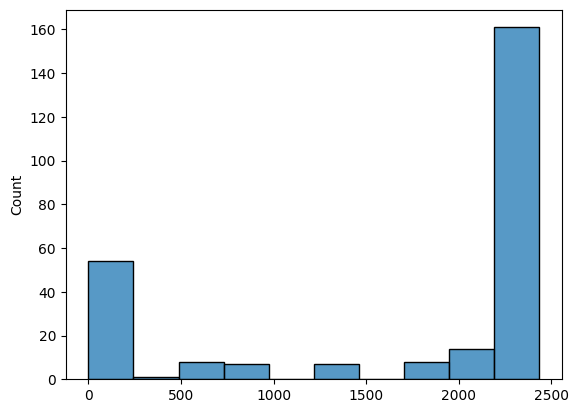

In [10]:
sns.histplot(isNAWalkingPaulista1)

Number of valid columns (no *NaN*s):

In [11]:
isNAWalkingPaulista1[isNAWalkingPaulista1 == 0].count()

46

Counting missing row values:

In [12]:
notNAColumnCount = isNAWalkingPaulista1[(isNAWalkingPaulista1 != 0) & (isNAWalkingPaulista1 != len(walkingPaulista1))]
notNAColumnCount

TA                   48
EVENT               284
EVENTDETAILS       2389
BAND               1885
SecondCell_NODE     548
                   ... 
NLAC12             2427
NCell12            2427
NARFCN12           2427
NRxLev12           2427
NQual12            2427
Length: 96, dtype: int64

Unique values:

In [13]:
walkingPaulista1.NetworkTypeNum.unique()

array([13])

In [14]:
walkingPaulista1.IP.unique()

array(['10.130.154.201'], dtype=object)

In [15]:
walkingPaulista1.Distance.unique()

array([-1])

In [16]:
walkingPaulista1.IMEI.unique()

array([nan])

In [17]:
walkingPaulista1.IMSI.unique()

array([nan])

Grouping the values of `[RAWCELLID, CGI, NetworkTech]`, we can see that each `RAWCELLID` only emits a single `CGI`, but it can work both on `4G` and `5G`. Then, we cannot tell the technology of the `RAWCELLID`/`CGI`.

In [18]:
walkingPaulista1[['RAWCELLID', 'CGI', 'NetworkTech']].groupby(['RAWCELLID', 'CGI', 'NetworkTech']).first()

Empty DataFrame
Columns: []
Index: [(28207363, 724054231100003, 4G), (28207391, 724054231100031, 4G), (28207391, 724054231100031, 5G), (28209166, 724054231100014, 4G), (28209166, 724054231100014, 5G), (28209167, 724054231100015, 4G), (28209167, 724054231100015, 5G), (28209183, 724054231100031, 4G), (28209666, 724054231100002, 4G), (28209666, 724054231100002, 5G), (28209667, 724054231100003, 5G), (28209678, 724054231100014, 4G), (28209679, 724054231100015, 4G), (28209679, 724054231100015, 5G), (28209694, 724054231100030, 4G), (28209695, 724054231100031, 4G), (28209695, 724054231100031, 5G), (28216323, 724054231100003, 4G), (28216323, 724054231100003, 5G), (28216585, 724054231100009, 4G), (28216585, 724054231100009, 5G), (28217345, 724054231100001, 4G), (28217345, 724054231100001, 5G), (28217346, 724054231100002, 4G), (28217346, 724054231100002, 5G), (28217347, 724054231100003, 4G), (28217347, 724054231100003, 5G), (28217359, 724054231100015, 4G), (28217359, 724054231100015, 5G), (28217374, 724054231100030, 4G), (28217375, 724054231100031, 4G), (28217375, 724054231100031, 5G), (28217601, 724054231100001, 5G), (28217617, 724054231100017, 4G), (28217617, 724054231100017, 5G), (28218882, 724054231100002, 4G), (28218882, 724054231100002, 5G), (28218883, 724054231100003, 4G), (28218883, 724054231100003, 5G), (28218895, 724054231100015, 4G), (28218895, 724054231100015, 5G), (28218911, 724054231100031, 4G), (28218911, 724054231100031, 5G), (28606721, 724054231100001, 4G), (28606721, 724054231100001, 5G), (28606722, 724054231100002, 5G), (28606730, 724054231100010, 5G), (28606731, 724054231100011, 5G), (28606733, 724054231100013, 4G), (28606733, 724054231100013, 5G), (28606750, 724054231100030, 4G), (28606750, 724054231100030, 5G), (28606751, 724054231100031, 4G), (28606751, 724054231100031, 5G), (28920322, 724054231100002, 4G), (28920322, 724054231100002, 5G)]

Grouping the values of `[CGI, RAWCELLID, NetworkTech]`, we can see that each `CGI` emits multiple `RAWCELLID` values and works on both `4G` and `5G`.

In [19]:
walkingPaulista1[['CGI', 'RAWCELLID', 'NetworkTech']].groupby(['CGI', 'RAWCELLID', 'NetworkTech']).first()

Empty DataFrame
Columns: []
Index: [(724054231100001, 28217345, 4G), (724054231100001, 28217345, 5G), (724054231100001, 28217601, 5G), (724054231100001, 28606721, 4G), (724054231100001, 28606721, 5G), (724054231100002, 28209666, 4G), (724054231100002, 28209666, 5G), (724054231100002, 28217346, 4G), (724054231100002, 28217346, 5G), (724054231100002, 28218882, 4G), (724054231100002, 28218882, 5G), (724054231100002, 28606722, 5G), (724054231100002, 28920322, 4G), (724054231100002, 28920322, 5G), (724054231100003, 28207363, 4G), (724054231100003, 28209667, 5G), (724054231100003, 28216323, 4G), (724054231100003, 28216323, 5G), (724054231100003, 28217347, 4G), (724054231100003, 28217347, 5G), (724054231100003, 28218883, 4G), (724054231100003, 28218883, 5G), (724054231100009, 28216585, 4G), (724054231100009, 28216585, 5G), (724054231100010, 28606730, 5G), (724054231100011, 28606731, 5G), (724054231100013, 28606733, 4G), (724054231100013, 28606733, 5G), (724054231100014, 28209166, 4G), (724054231100014, 28209166, 5G), (724054231100014, 28209678, 4G), (724054231100015, 28209167, 4G), (724054231100015, 28209167, 5G), (724054231100015, 28209679, 4G), (724054231100015, 28209679, 5G), (724054231100015, 28217359, 4G), (724054231100015, 28217359, 5G), (724054231100015, 28218895, 4G), (724054231100015, 28218895, 5G), (724054231100017, 28217617, 4G), (724054231100017, 28217617, 5G), (724054231100030, 28209694, 4G), (724054231100030, 28217374, 4G), (724054231100030, 28606750, 4G), (724054231100030, 28606750, 5G), (724054231100031, 28207391, 4G), (724054231100031, 28207391, 5G), (724054231100031, 28209183, 4G), (724054231100031, 28209695, 4G), (724054231100031, 28209695, 5G), (724054231100031, 28217375, 4G), (724054231100031, 28217375, 5G), (724054231100031, 28218911, 4G), (724054231100031, 28218911, 5G), (724054231100031, 28606751, 4G), (724054231100031, 28606751, 5G)]

<Axes: xlabel='Timestamp', ylabel='DL_bitrate'>

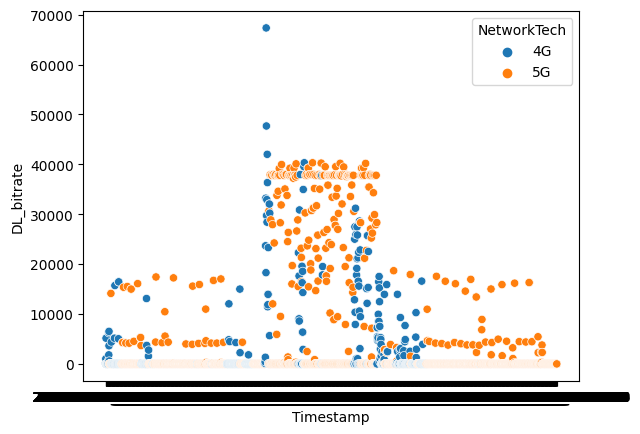

In [20]:
sns.scatterplot(data=walkingPaulista1, x='Timestamp', y='DL_bitrate', hue='NetworkTech')

<Axes: xlabel='Timestamp', ylabel='UL_bitrate'>

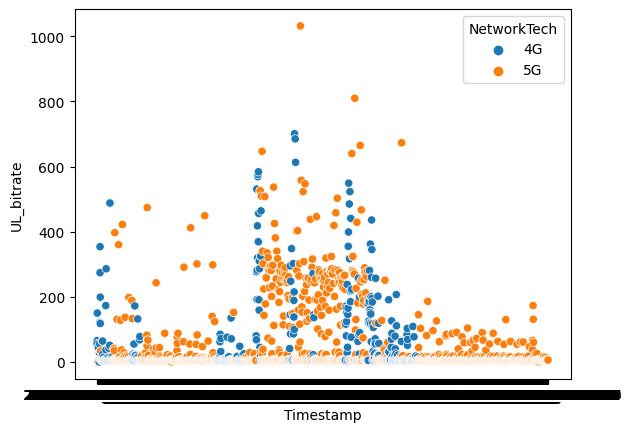

In [21]:
sns.scatterplot(data=walkingPaulista1, x='Timestamp', y='UL_bitrate', hue='NetworkTech')

<Axes: xlabel='NetworkTech', ylabel='DL_bitrate'>

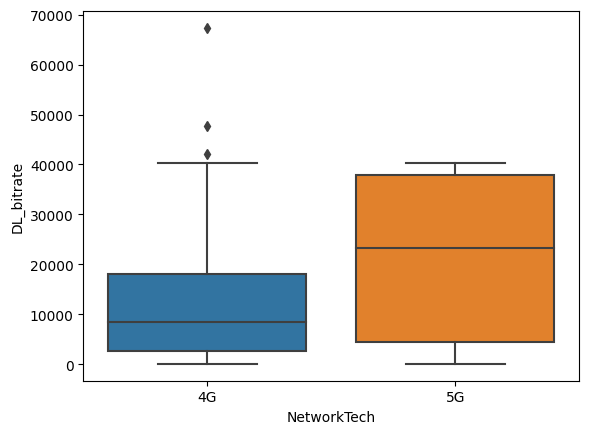

In [22]:
sns.boxplot(data=walkingPaulista1[walkingPaulista1.DL_bitrate > 50], y='DL_bitrate', x='NetworkTech')

<Axes: xlabel='NetworkTech', ylabel='UL_bitrate'>

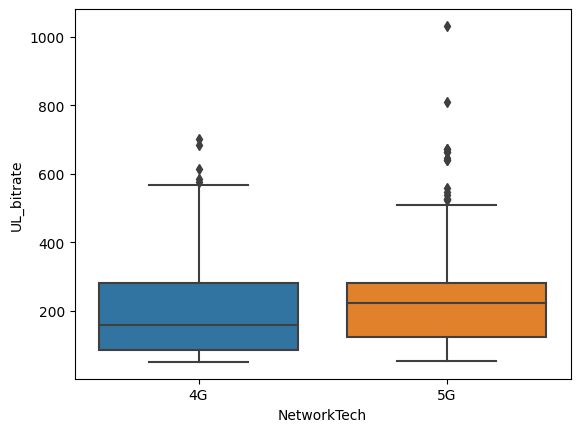

In [23]:
sns.boxplot(data=walkingPaulista1[walkingPaulista1.UL_bitrate > 50], y='UL_bitrate', x='NetworkTech')

<Axes: xlabel='Timestamp', ylabel='Level'>

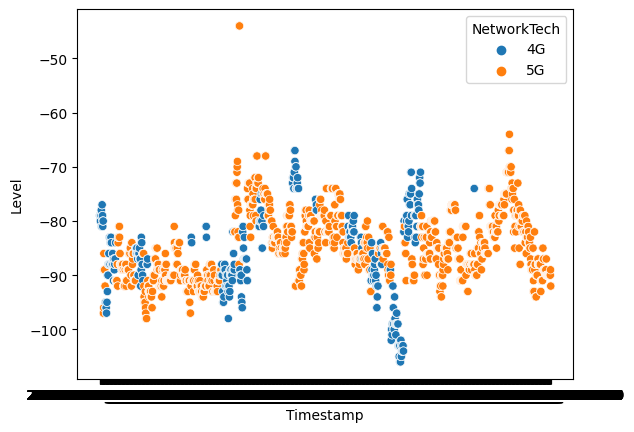

In [24]:
sns.scatterplot(data=walkingPaulista1, x='Timestamp', y='Level', hue='NetworkTech')

In [25]:
walkingPaulista1.groupby('NetworkTech')[['DL_bitrate', 'UL_bitrate']].mean()

,DL_bitrate,UL_bitrate
NetworkTech,,
4G,3638.032787,60.799636
5G,3735.725729,41.012732


In [26]:
temp = walkingPaulista1.replace({ 'NetworkMode': { 'LTE': '4G' } })
temp[temp.NetworkTech != temp.NetworkMode]

,Timestamp,Longitude,Latitude,Speed,Operatorname,Operator,CGI,Cellname,Node,CellID,LAC,NetworkTech,NetworkMode,Level,Qual,SNR,CQI,LTERSSI,ARFCN,DL_bitrate,UL_bitrate,PSC,Altitude,Height,Accuracy,Location,State,PINGAVG,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,TESTDOWNLINK,TESTUPLINK,TESTDOWNLINKMAX,TESTUPLINKMAX,Test_Status,DataConnection_Type,DataConnection_Info,Layer,Filemark,IMEI,Distance,Bearing,IP,TA,EVENT,EVENTDETAILS,IMSI,MSISDN,SERVINGTIME,CELLHEX,NODEHEX,LACHEX,RAWCELLID,VERSION_NAME,VERSION_CODE,DEVICE,BAND,BANDWIDTH,INFO,SecondCell_NODE,SecondCell_CELLID,SecondCell_RSRP,SecondCell_RSRQ,SecondCell_SNR,CSI_RSRP,CSI_RSRQ,CSI_SNR,NetworkTypeNum,CA,SecondCell_PSC,SecondCell_ARFCN,SecondCell_BAND,Site_BEARING,BATTERY,CHARGING,NRSTATE,R4,NTech1,NCellName1,NCellid1,NLAC1,NCell1,NARFCN1,NRxLev1,NQual1,NDistance1,NBearing1,NTech2,NCellName2,NCellid2,NLAC2,NCell2,NARFCN2,NRxLev2,NQual2,NDistance2,NBearing2,NTech3,NCellName3,NCellid3,NLAC3,NCell3,NARFCN3,NRxLev3,NQual3,NDistance3,NBearing3,NTech4,NCellName4,NCellid4,NLAC4,NCell4,NARFCN4,NRxLev4,NQual4,NDistance4,NBearing4,NTech5,NCellName5,NCellid5,NLAC5,NCell5,NARFCN5,NRxLev5,NQual5,NDistance5,NBearing5,NTech6,NCellName6,NCellid6,NLAC6,NCell6,NARFCN6,NRxLev6,NQual6,NDistance6,NBearing6,NTech7,NCellName7,NCellid7,NLAC7,NCell7,NARFCN7,NRxLev7,NQual7,NDistance7,NBearing7,NTech8,NCellName8,NCellid8,NLAC8,NCell8,NARFCN8,NRxLev8,NQual8,NDistance8,NBearing8,NTech9,NCellName9,NCellid9,NLAC9,NCell9,NARFCN9,NRxLev9,NQual9,NDistance9,NBearing9,NTech10,NCellName10,NCellid10,NLAC10,NCell10,NARFCN10,NRxLev10,NQual10,NDistance10,NBearing10,NTech11,NCellName11,NCellid11,NLAC11,NCell11,NARFCN11,NRxLev11,NQual11,NDistance11,NBearing11,NTech12,NCellName12,NCellid12,NLAC12,NCell12,NARFCN12,NRxLev12,NQual12,NDistance12,NBearing12,NTech13,NCellName13,NCellid13,NLAC13,NCell13,NARFCN13,NRxLev13,NQual13,NDistance13,NBearing13,NTech14,NCellName14,NCellid14,NLAC14,NCell14,NARFCN14,NRxLev14,NQual14,NDistance14,NBearing14,NTech15,NCellName15,NCellid15,NLAC15,NCell15,NARFCN15,NRxLev15,NQual15,NDistance15,NBearing15,NTech16,NCellName16,NCellid16,NLAC16,NCell16,NARFCN16,NRxLev16,NQual16,NDistance16,NBearing16,NTech17,NCellName17,NCellid17,NLAC17,NCell17,NARFCN17,NRxLev17,NQual17,NDistance17,NBearing17,NTech18,NCellName18,NCellid18,NLAC18,NCell18,NARFCN18,NRxLev18,NQual18,NDistance18,NBearing18,Unnamed: 259
237,2023.01.21_15.11.54,-46.660805,-23.557325,4,CLARO_BR,72405,724054231100003,NaN,110220,3,42311,4G,5G,-86,-3,-6.0,6,-91,2950,4,5,302,818,818,8,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,13,1,NaN,NaN,-1,1000,10.130.154.201,NaN,NaN,NaN,NaN,NaN,1,3,1AE8C,A547,28216323,27.5,535,samsung:SM-G991B:TP1A.220624.014,L7,20/20/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,False,NaN,NaN,NaN,1000,75,False,NaN,NaN,4G,NaN,0-0,0.0,302.0,1575.0,-83.0,-14.0,NaN,NaN,4G,NaN,0-0,0.0,213.0,250.0,-91.0,-16.0,NaN,NaN,4G,NaN,0-0,0.0,213.0,2950.0,-92.0,-17.0,NaN,NaN,4G,NaN,0-0,0.0,349.0,1575.0,-93.0,-20.0,NaN,NaN,4G,NaN,0-0,0.0,262.0,250.0,-95.0,-19.0,NaN,NaN,4G,NaN,0-0,0.0,262.0,2950.0,-96.0,-19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,2023.01.21_15.21.09,-46.656059,-23.561630,4,CLARO_BR,72405,724054231100015,NaN,110192,15,42311,5G,4G,-81,-14,-,14,-,1575,3,5,4,818,818,6,G,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,13,1,NaN,NaN,-1,1000,10.130.154.201,7.0,NaN,NaN,NaN,NaN,2,F,1AE70,A547,28209167,27.5,535,samsung:SM-G991B:TP1A.220624.014,NaN,15/20/20,NaN,110192.0,15.0,-81.0,-14.0,-1.0,NaN,NaN,NaN,13,True,4.0,1575.0,L3,1000,72,False,NaN,NaN,4G,NaN,110192-15,42311.0,4.0,1575.0,-81.0,-14.0,NaN,N